# Impact of family structure on the results of PISA 2012 test
## by (Iraklis Kalamas)

## Investigation Overview

> My main goal here is to show the relation that a family structure (i.e. single - parent or not family, the parent's time spend with students, the presence or not siblings and the academic background of parent(s)) affect the performance of the students in Math and Science parts of PISA 2012 test.

## Dataset Overview

> The original data set contains 635 features and 485490 observations. The final data set contains 10 features and 347783 observations. This is a part of the original data, sufficient for my analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("data/pisa2012_final.csv")

## Gender Distribution

> From the pie below we can see that there is no bias regarding the gender of students, since females and males are almost 50% each.

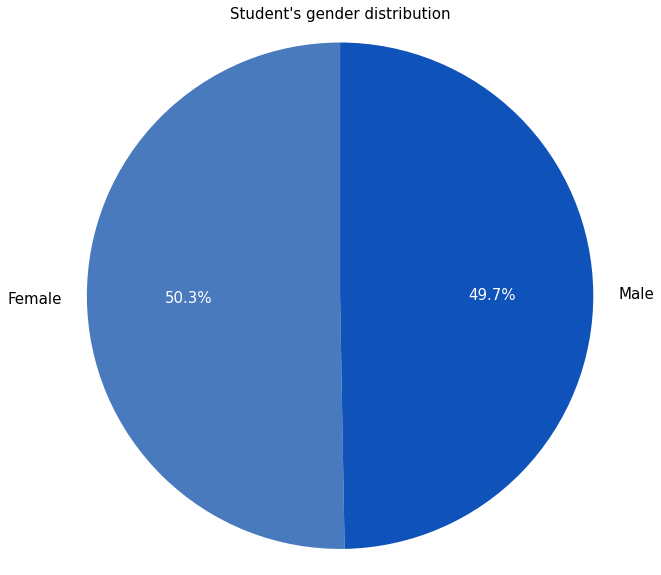

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
patches, texts, autotexts = ax.pie(df.Gender.value_counts(), 
                                    colors = ['#487ABD','#0f52ba'],
                                    labels=['Female','Male'],
                                    autopct='%1.1f%%',
                                    startangle=90
                                   );
for text in texts:
    text.set_color('black')
    text.set_size(15)
    
for text in autotexts:
    text.set_color('white')
    text.set_size(15)
    
ax.axis('equal');
plt.title("Student's gender distribution", fontsize = 15)
plt.show();

## How parents affect students performance?

> The following visualizations show the impact several aspects of families have on the performance of students in the test.

> The first shows that most students work alone and students working more than 4 hours with their parent(s) is rare.

> Second the academic background of parents shows that the higest it is the better the student performs in the test.

> In the third visualization we can see that onene out of five families its a single parent family and that 70% of students has sibling(s).

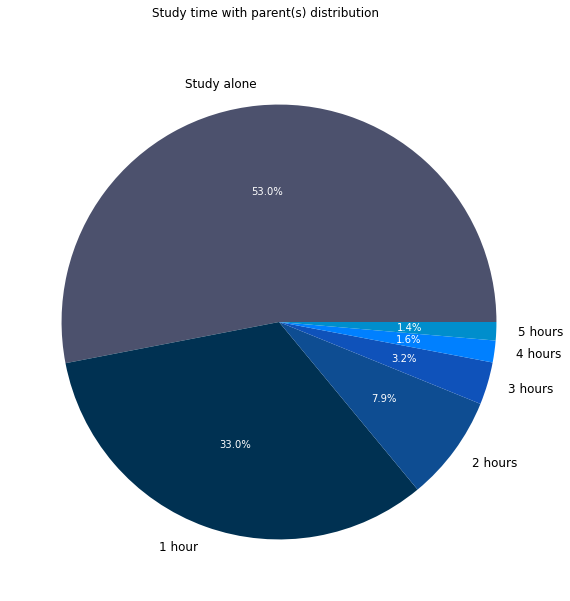

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

five = df[df['Study_Time_With_Parent'] < 6]['Study_Time_With_Parent'].value_counts()

patches, texts, autotexts = ax.pie(five, 
                                    colors = ['#4c516d','#003152','#0e4d92','#0f52ba','#0080ff','#008ecc'],
                                    labels=['Study alone', '1 hour', '2 hours', '3 hours', '4 hours', '5 hours'], 
                                    autopct='%1.1f%%',
                                    startangle=360
                                   );
for text in texts:
    text.set_color('black')
    text.set_size(12)
for text in autotexts:
    text.set_color('white')
    text.set_size(10)


plt.suptitle('Study time with parent(s) distribution', y=0.94)
plt.show();

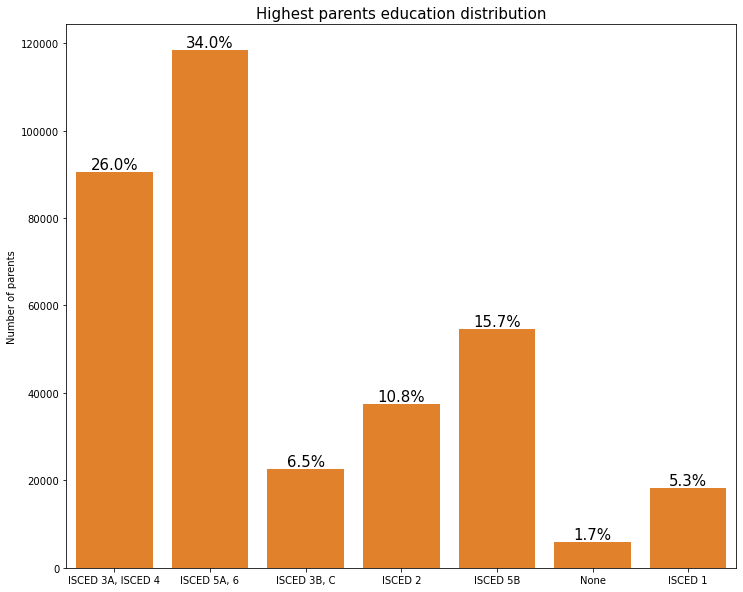

In [5]:
plt.figure(figsize=[12, 10]);
sb.countplot(x = 'Parent_Highest_Education', data = df, color = sb.color_palette()[1]);

points = df.shape[0]
education_counts = df.Parent_Highest_Education.value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):

    count = education_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/points)

    plt.text(loc, count, pct_string, ha = 'center', va='bottom', color = 'black', fontsize=15)

plt.ylabel('Number of parents');
plt.xlabel('');
plt.title('Highest parents education distribution', fontsize=15);

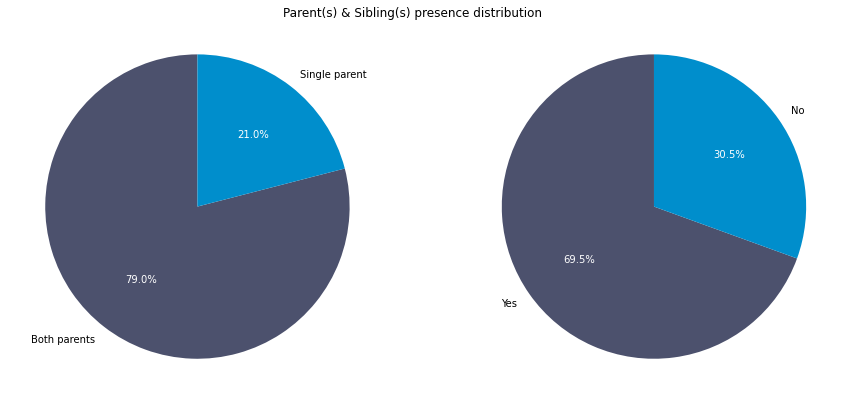

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
patches, texts, autotexts = ax1.pie(df.Parents_Present.value_counts(), colors = ['#4c516d','#008ecc'],
                                    labels=['Both parents','Single parent'],
                                    autopct='%1.1f%%',
                                    startangle=90
                                   );
for text in texts:
    text.set_color('black')
    
for text in autotexts:
    text.set_color('white')

patches, texts, autotexts = ax2.pie(df.Siblings_Present.value_counts(), colors = ['#4c516d','#008ecc'], labels=['Yes','No'],
                                    autopct='%1.1f%%',
                                    startangle=90
                                   );
for text in texts:
    text.set_color('black')
    
for text in autotexts:
    text.set_color('white')
    

plt.suptitle('Parent(s) & Sibling(s) presence distribution', y=0.9, ha='center')
plt.show();

## How much the time parents spend with students and theirs academic backgrounds impact student's performance?

> It seems that the highest the parent education level is the better the score is and the students with parents who has at least the upper secondary (ISCED3) tend to perform above the scores mean.

> When considering only number of hours between 0 and 5, there's a significant drop of about 70 points in the score, so studying with parents does not seems to be a positive factor. As the hours studing with parent grows the performance is not clearly affected, meaning that sometimes the performance affected positively and sometimes negatively (maybe some students have problems with math and science that parents sometimes can solve and sometimes can't due to their academic background)

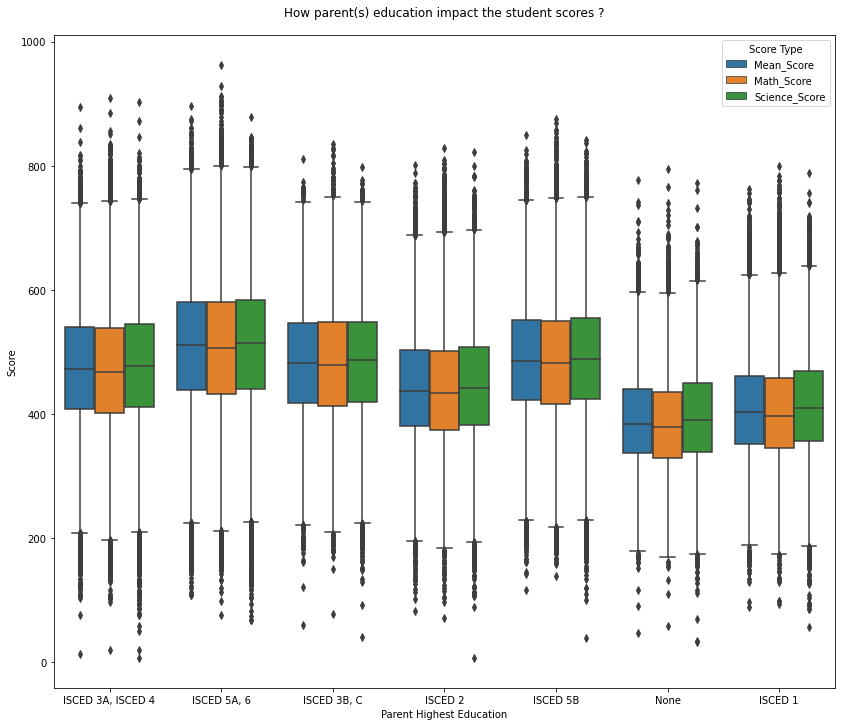

In [7]:
score_df = pd.melt(df, id_vars=['Parent_Highest_Education'], 
               value_vars=['Mean_Score', 'Math_Score', 'Science_Score'], 
               var_name="Score_Type", value_name='Score')

fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax = sb.boxplot(data = score_df, x = 'Parent_Highest_Education', y='Score', hue=score_df.Score_Type.tolist());

ax.set(xlabel='Parent Highest Education', ylabel='Score')
plt.title("How parent(s) education impact the student scores ?", y=1.02);
ax.legend(title='Score Type')

plt.show();

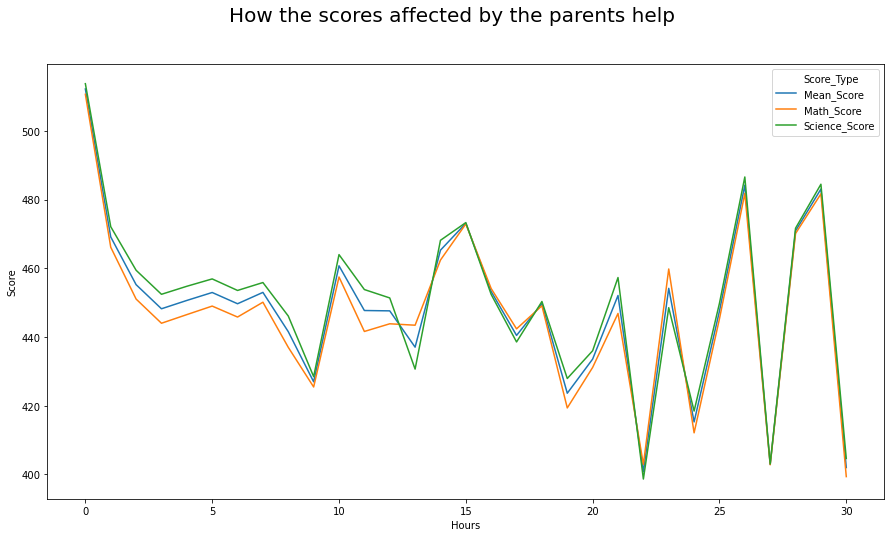

In [19]:
score_df = df.groupby(['Study_Time_With_Parent']).mean().reset_index()[['Study_Time_With_Parent','Mean_Score','Math_Score',
                                                                        'Science_Score']]
data = pd.melt(score_df, id_vars=['Study_Time_With_Parent'], 
               value_vars=['Mean_Score','Math_Score', 'Science_Score'], 
               var_name="Score_Type", value_name='Score')

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
fig.suptitle('How the scores affected by the parents help', fontsize=20)

sb.lineplot(ax=ax, data = data, x = 'Study_Time_With_Parent', y='Score', hue='Score_Type')
ax.set(xlabel='Hours', ylabel='Score');


## Finally we can find if the academic background in regard with the presence of siblings or not affects the perfomance

> The following plot shows that the better the academic backround and the lack of siblings favors the students performance (by 40 points almost) and the lack of education coupling with the lack of siblings also favors the student's performance (but marginally).

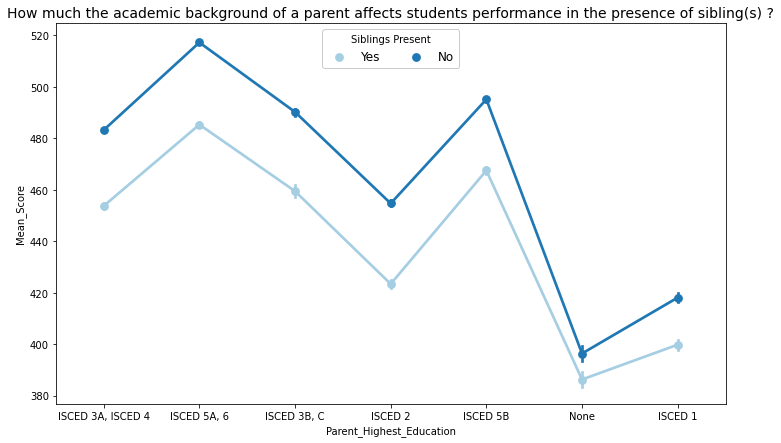

In [23]:
plt.figure(figsize = [12, 7])
ax = sb.pointplot(data = df, 
                  x = 'Parent_Highest_Education', y='Mean_Score', hue='Siblings_Present', 
                  palette = sb.color_palette("Paired"))
ax.legend(loc = 9, ncol = 6, framealpha = 1, title = 'Siblings Present', fontsize=12)
plt.title('How much the academic background of a parent affects students performance in the presence of sibling(s) ?', fontsize = 14);